In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from keras.layers import Dense, Input
from keras.layers.merge import concatenate
%matplotlib inline
import tensorflow as tf
tf.test.gpu_device_name()

C:\Users\ZhiQi\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


'/device:GPU:0'

In [2]:
train_set = pd.read_csv('train.csv')

mobile = train_set.iloc[506285:]
 
testset = pd.read_csv('test.csv')
mobile_test = testset.iloc[131985:]
mobile.head()

,itemid,title,Category,image_path
506285,2346660,apple iphone 4s back glass spare part original...,31,mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg
506286,2816338,iphone 4s 64gb white,31,mobile_image/3b9a11608551b11b9330268e0d055e01.jpg
506287,2847602,samsung sm b310e piton dual sim,32,mobile_image/1d719e936841a83c165da620f927de68.jpg
506288,3116949,samsung caramel gt e1272 dual sim 32 mb putih,32,mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg
506289,3794648,garskin sony experia z z1 z2 ultra,33,mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg


Train on 128264 samples, validate on 32066 samples
Epoch 1/40
128264/128264 [==============================] - 4s 31us/step - loss: 3.0058 - acc: 0.2491 - val_loss: 1.9273 - val_acc: 0.5033
Epoch 2/40
128264/128264 [==============================] - 2s 15us/step - loss: 1.6194 - acc: 0.5501 - val_loss: 1.2318 - val_acc: 0.6672
Epoch 3/40
128264/128264 [==============================] - 2s 15us/step - loss: 1.1652 - acc: 0.6975 - val_loss: 1.0026 - val_acc: 0.7375
Epoch 4/40
128264/128264 [==============================] - 2s 14us/step - loss: 0.9916 - acc: 0.7370 - val_loss: 0.9049 - val_acc: 0.7540
Epoch 5/40
128264/128264 [==============================] - 2s 14us/step - loss: 0.8984 - acc: 0.7580 - val_loss: 0.8359 - val_acc: 0.7663
Epoch 6/40
128264/128264 [==============================] - 2s 15us/step - loss: 0.8309 - acc: 0.7681 - val_loss: 0.7962 - val_acc: 0.7722
Epoch 7/40
128264/128264 [==============================] - 2s 15us/step - loss: 0.7794 - acc: 0.7788 - val_loss: 0

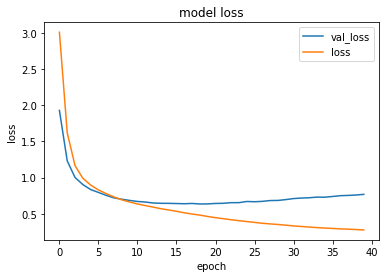

In [3]:
####Model building

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils


from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

train_size = int(len(mobile)) 
train_title = mobile['title'][:train_size] #Takes 70% of the training data to train
train_Category = mobile['Category'][:train_size] #Takes 70% of the training data to train

eval_title = mobile['title'][train_size:] #Takes remaining 30% of the training data to test
eval_Category = mobile['Category'][train_size:] #Takes remaining 30% of the training data to test

train_title = mobile['title']
train_Category = mobile['Category']

max_words = 12000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_title) # only fit on train

x_train = tokenize.texts_to_matrix(train_title)
x_eval = tokenize.texts_to_matrix(eval_title)

encoder = LabelEncoder()
encoder.fit(train_Category)
y_train = encoder.transform(train_Category)
y_eval = encoder.transform(eval_Category)
y_train = train_Category
y_eval = eval_Category


num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_eval = utils.to_categorical(y_eval, num_classes)

batch_size = 10000
epochs = 80

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.14))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

def display_training_graph(history):
    # summarize history for loss
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'loss'], loc='upper right')
    plt.draw()


display_training_graph(history)

In [4]:
### computing training accuracy using inhouse testset

score = model.evaluate(x_eval, y_eval,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

48099/48099 [==============================] - 1s 20us/step
Test accuracy: 0.856816139253956


In [4]:
### Predicting using actual testset

test_title = mobile_test['title']
x_test = tokenize.texts_to_matrix(test_title)
score = model.predict(x_test, batch_size=batch_size, verbose=1)

40417/40417 [==============================] - 8s 208us/step


In [5]:
#predicting using actual test set
mobile_predict = pd.DataFrame(data=score)
mobile_predict = mobile_predict.idxmax(axis=1)

In [6]:
mobile_predict.to_csv('mobile_predict.csv') 

C:\Users\ZhiQi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
model_json = model.to_json()
with open("model_mobile_text.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_mobile_text.h5")
print("Saved model to disk")